In [1]:
import sys, os  
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt

In [2]:
from keras.models import Sequential  
from keras.layers import Dense, Dropout, Activation, Flatten  
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D  
from keras.losses import categorical_crossentropy  
from keras.optimizers import Adam  
from keras.regularizers import l2  
from keras.utils import np_utils  
# pd.set_option('display.max_rows', 500)  
# pd.set_option('display.max_columns', 500)  
# pd.set_option('display.width', 1000)  

In [3]:
df=pd.read_csv('fer2013.csv')  

# print(df.info())  
# print(df["Usage"].value_counts())  

# print(df.head())  
X_train,train_y,X_test,test_y=[],[],[],[]  

In [4]:
def fer2013_show_instance(index):
    """Shows the image and the emotin labl of the index's instance"""
    image = np.reshape(training_data.at[index, "pixels"].split(" "), (width, height)).astype("float")
    image -= np.mean(image)
    image /= np.std(image)
    print(emotion_labels[training_data.at[index, "emotion"]])
    plt.imshow(image, cmap = "gray")

In [5]:
df.Usage.value_counts()

Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64

In [6]:
groups = [i for _, i in df.groupby('Usage')]
training_data = groups[2]
validation_data = groups[1]
testing_data= groups[0]

In [7]:
num_classes = 7
width = 48
height = 48
emotion_labels = ["Angry","Disgust","fear","Happy","Sad","Surprise","Neutral"]
Classes = np.array(["Angry","Disgust","fear","Happy","Sad","Surprise","Neutral"])

Happy


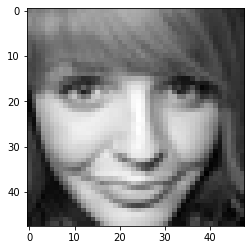

In [8]:
fer2013_show_instance(np.random.randint(90,len(training_data)))

In [9]:
import os
import zipfile
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [10]:
for index, row in df.iterrows():  
    val=row['pixels'].split(" ")  
    try:  
        if 'Training' in row['Usage']:  
           X_train.append(np.array(val,'float32'))  
           train_y.append(row['emotion'])  
        elif 'PublicTest' in row['Usage']:  
           X_test.append(np.array(val,'float32'))  
           test_y.append(row['emotion'])  
    except:  
        print(f"error occured at index :{index} and row:{row}")  

In [11]:
num_features = 64  
num_labels = 7  
batch_size = 64  
epochs = 30  
width, height = 48, 48  

In [12]:
X_train = np.array(X_train,'float32')  
train_y = np.array(train_y,'float32')  
X_test = np.array(X_test,'float32')  
test_y = np.array(test_y,'float32')  

In [13]:
train_y=np_utils.to_categorical(train_y, num_classes=num_labels)  
test_y=np_utils.to_categorical(test_y, num_classes=num_labels)  

In [14]:
#cannot produce  
#normalizing data between oand 1  
X_train -= np.mean(X_train, axis=0)  
X_train /= np.std(X_train, axis=0)  

X_test -= np.mean(X_test, axis=0)  
X_test /= np.std(X_test, axis=0)  

X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)  

X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)  

In [17]:
# print(f"shape:{X_train.shape}")  
##designing the cnn  
#1st convolution layer  
model = Sequential()  

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(X_train.shape[1:])))  
model.add(Conv2D(64,kernel_size= (3, 3), activation='relu'))  
# model.add(BatchNormalization())  
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))  
model.add(Dropout(0.5))  

#2nd convolution layer  
model.add(Conv2D(64, (3, 3), activation='relu'))  
model.add(Conv2D(64, (3, 3), activation='relu'))  
# model.add(BatchNormalization())  
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))  
model.add(Dropout(0.5))  

#3rd convolution layer  
model.add(Conv2D(128, (3, 3), activation='relu'))  
model.add(Conv2D(128, (3, 3), activation='relu'))  
# model.add(BatchNormalization())  
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))  

model.add(Flatten())  

#fully connected neural networks  
model.add(Dense(1024, activation='relu'))  
model.add(Dropout(0.2))  
model.add(Dense(1024, activation='relu'))  
model.add(Dropout(0.2))  

model.add(Dense(num_labels, activation='softmax'))  

# model.summary()  

In [18]:
#Compliling the model  
model.compile(loss=categorical_crossentropy,  
              optimizer=Adam(),  
              metrics=['accuracy'])  


In [19]:
#Training the model  
model.fit(X_train, train_y,  
          batch_size=batch_size,  
          epochs=epochs,  
          verbose=1,  
          validation_data=(X_test, test_y),  
          shuffle=True)  

Epoch 1/30
449/449 [==============================] - 361s 793ms/step - loss: 1.7942 - accuracy: 0.2533 - val_loss: 1.6165 - val_accuracy: 0.3430
Epoch 2/30
449/449 [==============================] - 352s 783ms/step - loss: 1.5817 - accuracy: 0.3741 - val_loss: 1.4567 - val_accuracy: 0.4283
Epoch 3/30
449/449 [==============================] - 351s 783ms/step - loss: 1.4535 - accuracy: 0.4376 - val_loss: 1.3460 - val_accuracy: 0.4776
Epoch 4/30
449/449 [==============================] - 352s 784ms/step - loss: 1.3693 - accuracy: 0.4713 - val_loss: 1.3117 - val_accuracy: 0.4999
Epoch 5/30
449/449 [==============================] - 350s 780ms/step - loss: 1.3199 - accuracy: 0.4885 - val_loss: 1.2833 - val_accuracy: 0.4965
Epoch 6/30
449/449 [==============================] - 352s 785ms/step - loss: 1.2840 - accuracy: 0.5087 - val_loss: 1.2414 - val_accuracy: 0.5199
Epoch 7/30
449/449 [==============================] - 352s 783ms/step - loss: 1.2684 - accuracy: 0.5094 - val_loss: 1.2262 -

In [20]:
#Saving the  model to  use it later on  
fer_json = model.to_json()  
with open("fer.json", "w") as json_file:  
    json_file.write(fer_json)  
model.save_weights("fer.h5")  

In [21]:
model_name = 'FER_Model.h5'
save_dir = 'D:/DataFlair/'
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at D:/DataFlair/FER_Model.h5 


In [1]:
from keras.preprocessing.image import img_to_array
import imutils
import cv2
from keras.models import load_model
import numpy as np

In [2]:
# parameters for loading data and images
detection_model_path = 'haarcascade_frontalface_default.xml'
emotion_model_path = 'FER_Model.h5'

In [3]:
# hyper-parameters for bounding boxes shape
# loading models
face_detection = cv2.CascadeClassifier(detection_model_path)
emotion_classifier = load_model(emotion_model_path, compile=False)
EMOTIONS = ["angry" ,"disgust","scared", "happy", "sad", "surprised",
 "neutral"]

In [ ]:
#feelings_faces = []
#for index, emotion in enumerate(EMOTIONS):
   # feelings_faces.append(cv2.imread('emojis/' + emotion + '.png', -1))
import cv2
# starting video streaming
cv2.namedWindow('your_face')
camera = cv2.VideoCapture(0)
while True:
    frame = camera.read()[1]
    #reading the frame
    frame = imutils.resize(frame,width=300)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_detection.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5,minSize=(30,30),flags=cv2.CASCADE_SCALE_IMAGE)
    
    canvas = np.zeros((250, 300, 3), dtype="uint8")
    frameClone = frame.copy()
    if len(faces) > 0:
        faces = sorted(faces, reverse=True,
        key=lambda x: (x[2] - x[0]) * (x[3] - x[1]))[0]
        (fX, fY, fW, fH) = faces
                    # Extract the ROI of the face from the grayscale image, resize it to a fixed 28x28 pixels, and then prepare
            # the ROI for classification via the CNN
        roi = gray[fY:fY + fH, fX:fX + fW]
        roi = cv2.resize(roi, (48, 48))
        roi = roi.astype("float") / 255.0
        roi = img_to_array(roi)
        roi = np.expand_dims(roi, axis=0)
        
        
        preds = emotion_classifier.predict(roi)[0]
        emotion_probability = np.max(preds)
        label = EMOTIONS[preds.argmax()]
    else: continue

 
    for (i, (emotion, prob)) in enumerate(zip(EMOTIONS, preds)):
                # construct the label text
                text = "{}: {:.2f}%".format(emotion, prob * 100)

                # draw the label + probability bar on the canvas
               # emoji_face = feelings_faces[np.argmax(preds)]

                
                w = int(prob * 300)
                cv2.rectangle(canvas, (7, (i * 35) + 5),
                (w, (i * 35) + 35), (0, 0, 255), -1)    
                cv2.putText(canvas, text, (10, (i * 35) + 23),
                cv2.FONT_HERSHEY_SIMPLEX, 0.45,
                (255, 255, 255), 2)
                cv2.putText(frameClone, label, (fX, fY - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
                cv2.rectangle(frameClone, (fX, fY), (fX + fW, fY + fH),
                              (0, 0, 255), 2)
#    for c in range(0, 3):
#        frame[200:320, 10:130, c] = emoji_face[:, :, c] * \
#        (emoji_face[:, :, 3] / 255.0) + frame[200:320,
#        10:130, c] * (1.0 - emoji_face[:, :, 3] / 255.0)

    cv2.imshow('your_face', frameClone)
    cv2.imshow("Probabilities", canvas)                                                                                                                                                                                                                                    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

camera.release()
cv2.destroyAllWindows()